In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

base_path = '/content/gdrive/MyDrive/colabdata/kaggle/'


Mounted at /content/gdrive


In [4]:
!mv /content/gdrive/MyDrive/Downloads/kaggle-kakr-housing-data.zip /content

In [7]:
!ls

data  gdrive  kaggle-kakr-housing-data.zip  sample_data


In [6]:
!unzip kaggle-kakr-housing-data.zip

Archive:  kaggle-kakr-housing-data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [8]:
%cd data

/content/data


In [9]:
!ls

sample_submission.csv  test.csv  train.csv


In [35]:
!pip install kaggle
from google.colab import files
files.upload()
import os  
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/colabdata/kaggle'

Saving kaggle.json to kaggle.json


In [ ]:
#!kaggle competitions download -c 2019-2nd-ml-month-with-kakr -p /content/gdrive/MyDrive/colabdata/kaggle/second_KaKR

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#!unzip /content/gdrive/MyDrive/colabdata/kaggle/second_KaKR/train.csv.zip -d /content/gdrive/MyDrive/colabdata/kaggle/second_KaKR

Archive:  /content/gdrive/MyDrive/colabdata/kaggle/second_KaKR/train.csv.zip
replace /content/gdrive/MyDrive/colabdata/kaggle/second_KaKR/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
path = '/content/data'

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_data_path = join(path,'train.csv')
test_data_path = join(path,'test.csv')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.101.89.50:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.101.89.50:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.101.89.50:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [13]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [14]:
len(test_data)

6468

In [16]:
train_len = train_data.shape[0]
sub_id = test_data['id']
data = pd.concat((train_data,test_data), axis=0,ignore_index=True)
y = data['price']
data = data.drop(columns="price")
data = data.drop(columns="id")
data['date']=data['date'].apply(lambda x :  str(x[:6])).astype(int)

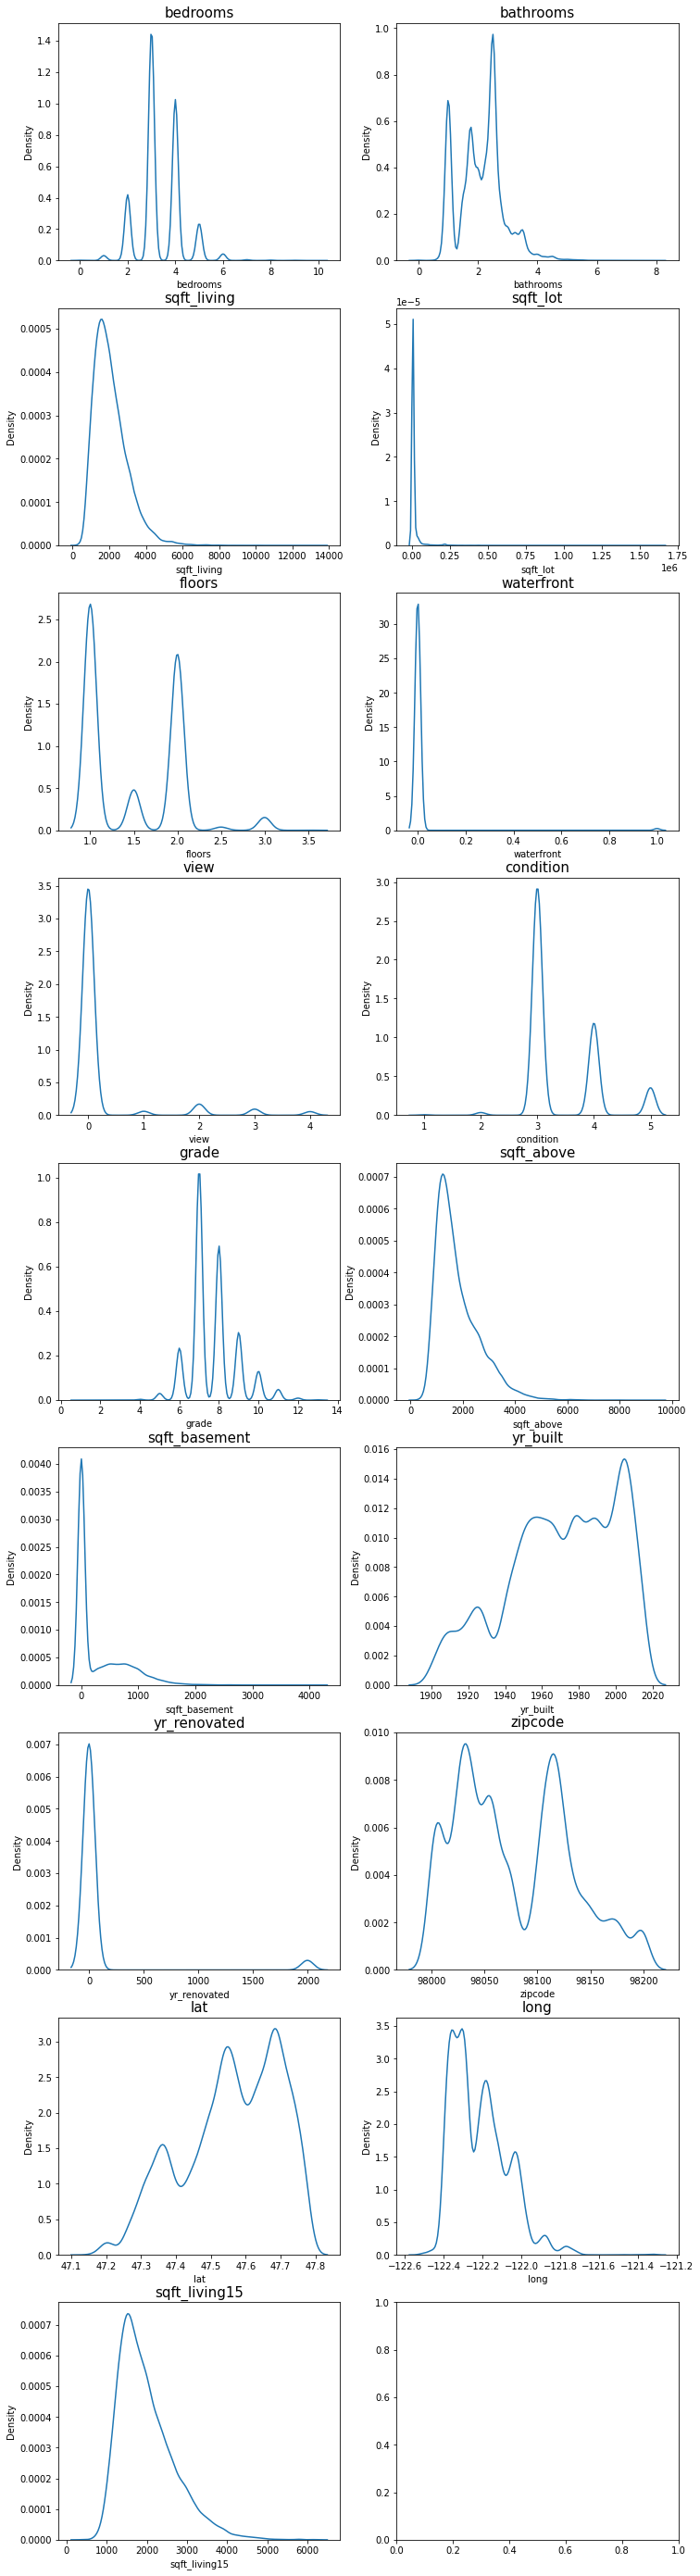

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 18 :
            break

In [17]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

In [18]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

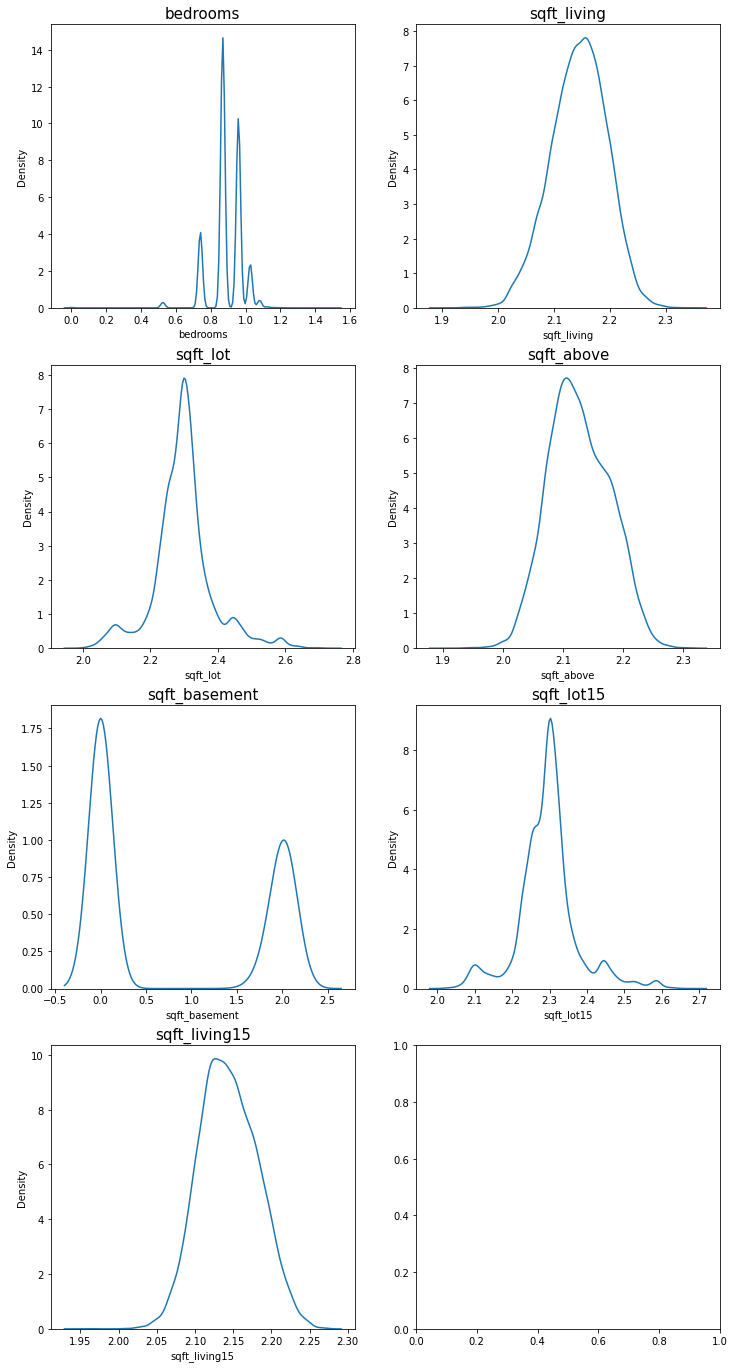

In [19]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

In [20]:
x = data.iloc[:train_len,:]
sub = data.iloc[train_len:,:]
y=y[:train_len]
y = np.log1p(y)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
def rmse(y_test,y_pred):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [23]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [24]:
random_state=2021 
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}
gboost = GradientBoostingRegressor(random_state=random_state)
grid_gboost=GridSearchCV(gboost,param_grid=param_grid,scoring='neg_mean_squared_error',
                         cv=5,verbose=1,n_jobs=5)
xgboost = XGBRegressor(random_state=random_state)
grid_gboost = GridSearchCV(xgboost,param_grid=param_grid,scoring='neg_mean_squared_error',
                         cv=5,verbose=1,n_jobs=5)
lightgbm = LGBMRegressor(max_depth = 70,learning_rate =0.05,
                         random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state,
                                 min_samples_split=3,min_samples_leaf=2)

models = [grid_gboost, xgboost, lightgbm, rdforest]

In [25]:

df_pred = {}
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=random_state,test_size=0.2)

for model in models:

  model_name = model.__class__.__name__

  model.fit(X_train,y_train)

  df_pred[model_name] = model.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   21.0s finished


[02:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
y_pred=np.array
for idx, model in enumerate(models):
  model_name = model.__class__.__name__
  if idx == 0:
    y_pred = df_pred[model_name]
  else:
    y_pred += df_pred[model_name]
y_pred/=4

df=rmse(y_test,y_pred)



In [27]:
df_pred = {}
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=random_state,test_size=0.2)
test_data=data[train_len:]
for model in models:

  model_name = model.__class__.__name__

  model.fit(X_train,y_train)

  df_pred[model_name] = model.predict(data[train_len:])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   17.9s finished


[02:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
y_pred=np.array
for idx, model in enumerate(models):
  model_name = model.__class__.__name__
  if idx == 0:
    y_pred = df_pred[model_name]
  else:
    y_pred += df_pred[model_name]
y_pred/=4




In [31]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})


In [37]:
result.head()

,id,price
0,15035,13.128290
1,15036,12.978451
2,15037,14.103071
3,15038,12.662076
4,15039,12.664270


In [38]:
result.tail()

,id,price
6463,21498,12.335382
6464,21499,12.872291
6465,21500,13.014634
6466,21501,12.727087
6467,21502,12.942480


In [33]:
my_submission_path = join(path, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/content/data/submission.csv


In [39]:
!kaggle competitions submit -c 2019-2nd-ml-month-with-kakr -f /content/data/submission.csv -m ""

100% 101k/101k [00:00<00:00, 119kB/s]
Successfully submitted to 2019 2nd ML month with KaKR